<a href="https://colab.research.google.com/github/nicovakr/Pytorch-init/blob/master/Image_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image & Logistic Regression 



In [1]:
import numpy
import matplotlib
import torch
import torchvision
import torchaudio

In [2]:
from torchvision.datasets import MNIST

In [3]:
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
# 60,000 images to train the model
len(dataset)

60000

In [5]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F578B378E50>, 5)

In [7]:
import matplotlib.pyplot as plt
# indicate to jupyter that we want to plot the graphs within the notebook
# without the following line jupyter plot graphs in a popup
%matplotlib inline

Others magic functions :

https://ipython.readthedocs.io/en/stable/interactive/magics.html .

Label: 5


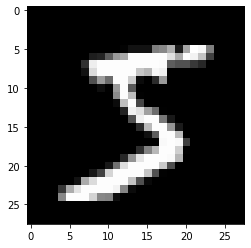

In [10]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


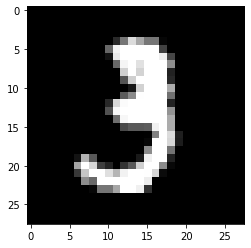

In [13]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [14]:
# to convert images into tensors
import torchvision.transforms as transforms

In [15]:
# convert with the function 'ToTensor'
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [16]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
# first dimension tracks color channels
# second and third dimensions represent pixels along height and width

torch.Size([1, 28, 28]) 5


In [17]:
print(img_tensor[0, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))
# 0 represents black
# 1 represents white

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


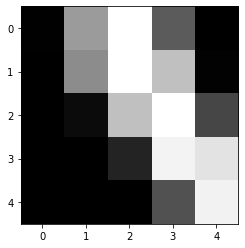

In [21]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

## Training and Validation Datasets

In [23]:
from torch.utils.data import random_split

In [24]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [25]:
from torch.utils.data import DataLoader

In [26]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size)

# Model

In [27]:
import torch.nn as nn

In [28]:
input_size = 28*28
num_classes = 10

In [29]:
# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [30]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0347,  0.0042,  0.0234,  ..., -0.0200,  0.0254, -0.0206],
        [-0.0082,  0.0205, -0.0063,  ..., -0.0006, -0.0171,  0.0040],
        [ 0.0123,  0.0042,  0.0115,  ...,  0.0178,  0.0171,  0.0170],
        ...,
        [-0.0129, -0.0140,  0.0299,  ...,  0.0135, -0.0205, -0.0120],
        [ 0.0225,  0.0279, -0.0324,  ...,  0.0126, -0.0117,  0.0275],
        [ 0.0266,  0.0064, -0.0093,  ..., -0.0244, -0.0033,  0.0348]],
       requires_grad=True)

In [31]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0283,  0.0134, -0.0035,  0.0080,  0.0255, -0.0236, -0.0063, -0.0009,
         0.0291,  0.0323], requires_grad=True)

In [32]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  print(outputs)
  break

tensor([4, 9, 7, 3, 6, 1, 3, 1, 2, 1, 0, 2, 8, 8, 3, 5, 1, 1, 1, 0, 6, 4, 1, 8,
        0, 5, 8, 4, 1, 4, 2, 7, 9, 3, 4, 1, 1, 1, 9, 3, 0, 3, 7, 9, 2, 5, 3, 3,
        2, 4, 3, 1, 3, 1, 4, 7, 5, 0, 6, 2, 8, 5, 9, 7, 8, 7, 1, 3, 1, 1, 6, 7,
        0, 7, 2, 7, 4, 6, 8, 9, 6, 5, 7, 7, 1, 8, 3, 8, 9, 5, 1, 2, 4, 6, 4, 5,
        1, 9, 7, 8, 3, 0, 8, 1, 9, 5, 3, 2, 1, 9, 6, 6, 0, 1, 4, 5, 1, 4, 7, 8,
        1, 3, 0, 6, 1, 3, 8, 3])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [33]:
images.shape

torch.Size([128, 1, 28, 28])

In [34]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [36]:
class MnistModel(nn.Module):
  def __init__(self):
    # instantiate the weights and biases using nn.Linear
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    
    xb = xb.reshape(-1, 784) # (-1, 28*28) : indicates to pytorch we want a view
                             # of xb tensor in 2D
    out = self.linear(xb)
    return out

model = MnistModel()

In [37]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [38]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0180, -0.0313,  0.0107,  ...,  0.0238,  0.0086,  0.0172],
         [ 0.0140, -0.0180,  0.0187,  ...,  0.0302,  0.0040,  0.0074],
         [ 0.0133, -0.0278,  0.0343,  ...,  0.0112,  0.0124, -0.0100],
         ...,
         [ 0.0309,  0.0090, -0.0293,  ..., -0.0035, -0.0074, -0.0314],
         [-0.0321,  0.0241,  0.0185,  ...,  0.0187,  0.0308,  0.0036],
         [-0.0256, -0.0224,  0.0320,  ..., -0.0355,  0.0121,  0.0320]],
        requires_grad=True), Parameter containing:
 tensor([-0.0163, -0.0284,  0.0252, -0.0121, -0.0126,  0.0184,  0.0190, -0.0024,
          0.0045,  0.0069], requires_grad=True)]

In [39]:
for images, labels in train_loader:
  print(images.shape)
  outputs = model(images)
  break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0496, -0.1497, -0.0895,  0.3562,  0.0425, -0.1740,  0.2736,  0.0293,
         -0.0713,  0.0632],
        [-0.2061, -0.0989, -0.0565, -0.1853,  0.2038, -0.4726,  0.1138,  0.0503,
         -0.0412, -0.0981]])


## Soft Max function

S(y_i) = exp(y_i) / sum{j}(exp(y_j))

In [40]:
import torch.nn.functional as F

In [41]:
outputs[:2]

tensor([[-0.0496, -0.1497, -0.0895,  0.3562,  0.0425, -0.1740,  0.2736,  0.0293,
         -0.0713,  0.0632],
        [-0.2061, -0.0989, -0.0565, -0.1853,  0.2038, -0.4726,  0.1138,  0.0503,
         -0.0412, -0.0981]], grad_fn=<SliceBackward0>)

In [42]:
# apply softmax for each output row
probs = F.softmax(outputs, dim = 1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0917, 0.0829, 0.0881, 0.1376, 0.1005, 0.0810, 0.1267, 0.0992, 0.0897,
         0.1026],
        [0.0867, 0.0965, 0.1007, 0.0885, 0.1307, 0.0664, 0.1194, 0.1121, 0.1023,
         0.0966]])
Sum:  1.0


In [48]:
max_probs, preds = torch.max(probs, dim = 1)
print(preds)
print(max_probs)

tensor([3, 4, 3, 6, 3, 6, 6, 3, 6, 0, 3, 6, 7, 3, 4, 3, 3, 2, 6, 3, 6, 4, 6, 9,
        3, 6, 3, 3, 9, 3, 2, 6, 6, 6, 3, 4, 2, 4, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6,
        3, 3, 3, 3, 6, 3, 6, 6, 3, 3, 3, 6, 2, 4, 6, 0, 3, 6, 6, 6, 4, 3, 4, 2,
        7, 3, 3, 3, 6, 6, 6, 3, 3, 3, 3, 6, 3, 3, 6, 4, 4, 9, 3, 4, 3, 3, 4, 3,
        3, 3, 3, 3, 6, 6, 3, 6, 6, 3, 2, 3, 3, 3, 3, 6, 3, 3, 6, 3, 3, 6, 3, 6,
        1, 3, 3, 6, 6, 7, 3, 7])
tensor([0.1376, 0.1307, 0.1427, 0.1535, 0.1376, 0.1431, 0.1239, 0.1604, 0.1319,
        0.1278, 0.1424, 0.1336, 0.1512, 0.1549, 0.1227, 0.1253, 0.1483, 0.1325,
        0.1265, 0.1544, 0.1247, 0.1425, 0.1174, 0.1275, 0.1541, 0.1197, 0.1258,
        0.1252, 0.1189, 0.1343, 0.1265, 0.1438, 0.1276, 0.1390, 0.1436, 0.1214,
        0.1293, 0.1457, 0.1539, 0.1651, 0.1420, 0.1291, 0.1642, 0.1284, 0.1421,
        0.1169, 0.1545, 0.1351, 0.1358, 0.1359, 0.1303, 0.1315, 0.1363, 0.1420,
        0.1191, 0.1237, 0.1416, 0.1280, 0.1378, 0.1450, 0.1239, 0.1404, 0.1224,
       

In [49]:
labels

tensor([1, 5, 1, 8, 8, 7, 6, 1, 3, 0, 3, 0, 0, 8, 5, 9, 8, 2, 1, 5, 4, 0, 1, 9,
        9, 0, 1, 9, 4, 0, 4, 1, 5, 3, 4, 6, 5, 3, 1, 0, 3, 9, 5, 7, 7, 7, 2, 4,
        2, 9, 9, 9, 6, 1, 7, 0, 9, 3, 4, 5, 8, 2, 4, 2, 1, 0, 0, 4, 0, 6, 5, 8,
        0, 4, 7, 3, 3, 8, 0, 4, 7, 7, 3, 2, 3, 5, 9, 3, 0, 9, 1, 8, 7, 8, 0, 5,
        0, 6, 8, 0, 2, 9, 8, 9, 4, 1, 9, 0, 4, 3, 8, 8, 5, 7, 4, 2, 7, 7, 0, 6,
        3, 3, 9, 7, 9, 5, 8, 0])

## Evaluation Metric and Loss Function

In [50]:
outputs[:2]

tensor([[-0.0496, -0.1497, -0.0895,  0.3562,  0.0425, -0.1740,  0.2736,  0.0293,
         -0.0713,  0.0632],
        [-0.2061, -0.0989, -0.0565, -0.1853,  0.2038, -0.4726,  0.1138,  0.0503,
         -0.0412, -0.0981]], grad_fn=<SliceBackward0>)

In [51]:
torch.sum(preds == labels)

tensor(15)

In [55]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [56]:
accuracy(outputs, labels)

tensor(0.1172)

In [57]:
probs

tensor([[0.0917, 0.0829, 0.0881,  ..., 0.0992, 0.0897, 0.1026],
        [0.0867, 0.0965, 0.1007,  ..., 0.1121, 0.1023, 0.0966],
        [0.0945, 0.0805, 0.0955,  ..., 0.0927, 0.0895, 0.0952],
        ...,
        [0.1115, 0.1134, 0.0911,  ..., 0.1200, 0.0934, 0.0972],
        [0.0951, 0.0724, 0.0936,  ..., 0.0978, 0.0860, 0.1143],
        [0.1173, 0.0922, 0.0841,  ..., 0.1385, 0.0703, 0.0943]],
       grad_fn=<SoftmaxBackward0>)

In [58]:
outputs

tensor([[-0.0496, -0.1497, -0.0895,  ...,  0.0293, -0.0713,  0.0632],
        [-0.2061, -0.0989, -0.0565,  ...,  0.0503, -0.0412, -0.0981],
        [-0.0230, -0.1829, -0.0127,  ..., -0.0423, -0.0774, -0.0156],
        ...,
        [ 0.0836,  0.1010, -0.1182,  ...,  0.1571, -0.0929, -0.0533],
        [-0.1134, -0.3861, -0.1288,  ..., -0.0845, -0.2130,  0.0706],
        [ 0.3299,  0.0892, -0.0031,  ...,  0.4962, -0.1818,  0.1121]],
       grad_fn=<AddmmBackward0>)

In [59]:
loss_fn = F.cross_entropy

In [60]:
# loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3311, grad_fn=<NllLossBackward0>)


# Training the model

In [64]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  optimizer = opt_func(model.parameters(), lr)
  history = []

  for epoch in range(epochs):

    # Training phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Validation phase
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history

In [62]:
l1 = [1, 2, 3, 4, 5]
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [63]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss': loss, 'val_acc': acc}